In [3]:
! pip install ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468)

In [5]:
# data (as pandas dataframes)
X = online_shoppers_purchasing_intention_dataset.data.features
y = online_shoppers_purchasing_intention_dataset.data.targets

In [6]:
# metadata
print(online_shoppers_purchasing_intention_dataset.metadata)

{'uci_id': 468, 'name': 'Online Shoppers Purchasing Intention Dataset', 'repository_url': 'https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/468/data.csv', 'abstract': 'Of the 12,330 sessions in the dataset,\n84.5% (10,422) were negative class samples that did not\nend with shopping, and the rest (1908) were positive class\nsamples ending with shopping.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 12330, 'num_features': 17, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Revenue'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Thu Jan 11 2024', 'dataset_doi': '10.24432/C5F88Q', 'creators': ['C. Sakar', 'Yomi Kastro'], 'intro_paper': {'ID': 367, 'type': 'NATIVE', 'title': 'Real-time prediction of online shoppers’ pur

In [10]:
# variable information
print(online_shoppers_purchasing_intention_dataset.variables)

                       name     role         type demographic description  \
0            Administrative  Feature      Integer        None        None   
1   Administrative_Duration  Feature      Integer        None        None   
2             Informational  Feature      Integer        None        None   
3    Informational_Duration  Feature      Integer        None        None   
4            ProductRelated  Feature      Integer        None        None   
5   ProductRelated_Duration  Feature   Continuous        None        None   
6               BounceRates  Feature   Continuous        None        None   
7                 ExitRates  Feature   Continuous        None        None   
8                PageValues  Feature      Integer        None        None   
9                SpecialDay  Feature      Integer        None        None   
10                    Month  Feature  Categorical        None        None   
11         OperatingSystems  Feature      Integer        None        None   

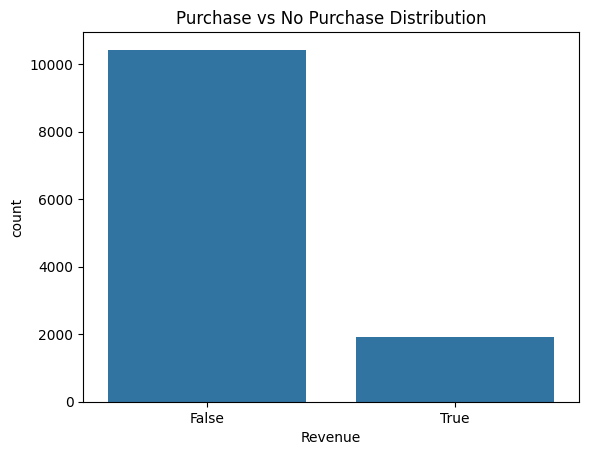

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.concat([X, y], axis=1)

sns.countplot(x='Revenue', data=df)
plt.title("Purchase vs No Purchase Distribution")
plt.show()

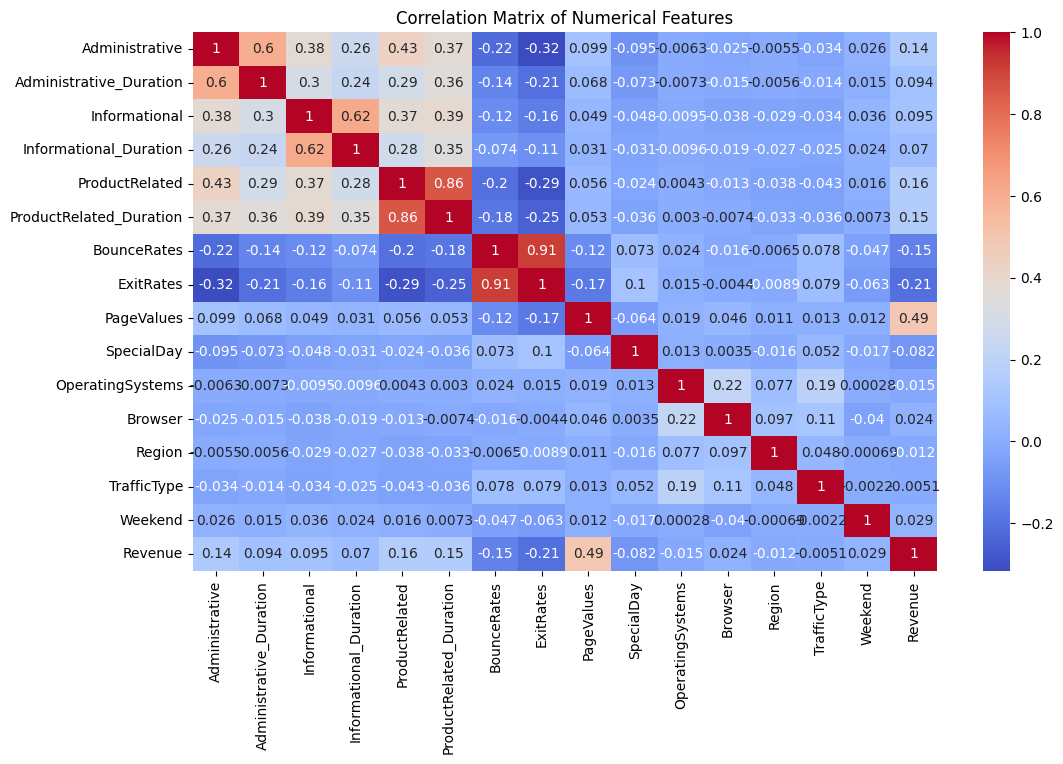

In [13]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

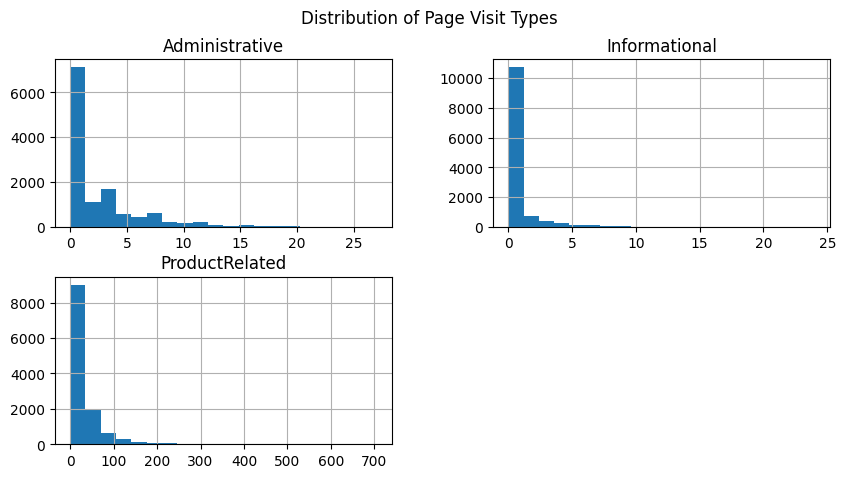

In [14]:
page_features = ['Administrative', 'Informational', 'ProductRelated']
df[page_features].hist(bins=20, figsize=(10,5))
plt.suptitle("Distribution of Page Visit Types")
plt.show()

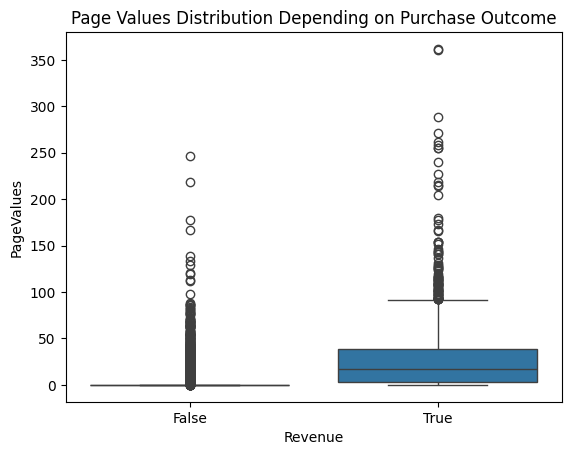

In [16]:
sns.boxplot(data=df, x='Revenue', y='PageValues')
plt.title("Page Values Distribution Depending on Purchase Outcome")
plt.show()

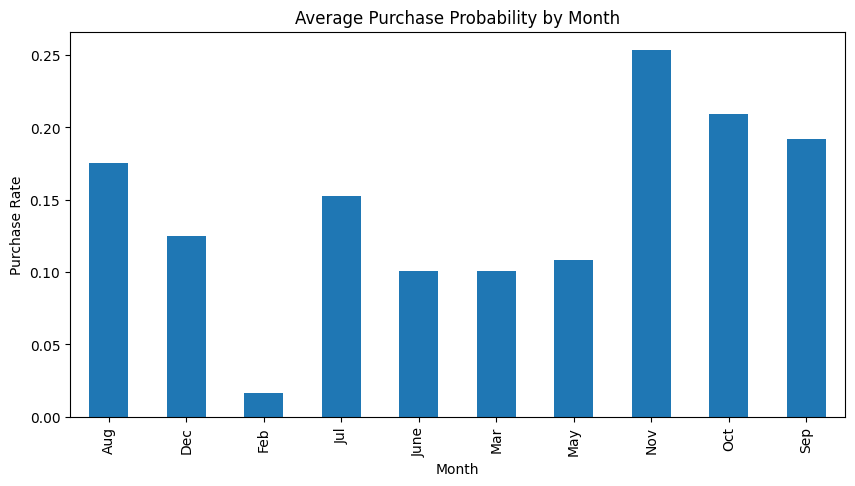

In [17]:
df.groupby('Month')['Revenue'].mean().plot(kind='bar', figsize=(10,5))
plt.title("Average Purchase Probability by Month")
plt.ylabel("Purchase Rate")
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Identify categorical and numerical columns
num_cols = X.select_dtypes(include=['int64','float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns


# Preprocessing pipeline
tf = ColumnTransformer([
('num', StandardScaler(), num_cols),
('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)